# Project Name : Covid-19 twitte sentiment analysis and building ML model
### Author : Nosin Ibna Mahbub

In [1]:

from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Importing all necessary libries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#loading dataset
data=pd.read_csv('/content/drive/My Drive/main_dataset.csv',index_col=0)

In [14]:
data.head()

,user_id,screen_name,text
5,15872418.0,ABSCBNNews,G20 agrees to debt relief for poorest countrie...
7,171548670.0,RadioNLNews,B.C. health officials are urging people to kin...
9,23517017.0,953WDAE,The Lovely Lisa Ann Joins The Show LIVE From N...
10,613510703.0,matanock,@allisonnamias @ArriolaLR As @ethanbdm referen...
11,38489678.0,JAMA_current,Study suggests higher rates of co-infection be...


In [15]:
#droping all columns except text column
df=data.drop(['user_id','screen_name'], axis = 1) 

In [16]:
#reset the index
df.reset_index(inplace = True) 

In [17]:
df.drop(['index'],axis=1,inplace=True)

In [18]:
df.head()

,text
0,G20 agrees to debt relief for poorest countrie...
1,B.C. health officials are urging people to kin...
2,The Lovely Lisa Ann Joins The Show LIVE From N...
3,@allisonnamias @ArriolaLR As @ethanbdm referen...
4,Study suggests higher rates of co-infection be...


In [19]:
clean_data=df.iloc[:10000,:]

In [20]:
clean_data.head()

,text
0,G20 agrees to debt relief for poorest countrie...
1,B.C. health officials are urging people to kin...
2,The Lovely Lisa Ann Joins The Show LIVE From N...
3,@allisonnamias @ArriolaLR As @ethanbdm referen...
4,Study suggests higher rates of co-infection be...


In [21]:
#Clean text
#function for cleaning text
def cleanText(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) 
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'https?:\/\/\S+','',text)
    
    return text

clean_data['text']=clean_data['text'].apply(cleanText)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [22]:
clean_data.head()

,text
0,G20 agrees to debt relief for poorest countrie...
1,B.C. health officials are urging people to kin...
2,The Lovely Lisa Ann Joins The Show LIVE From N...
3,"As referenced, just saw this op-ed version ..."
4,Study suggests higher rates of co-infection be...


In [23]:
from textblob import TextBlob
from wordcloud import WordCloud

In [24]:
# Create a function to get subjectivity and polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new ccolumns

clean_data['Subjectivity']=clean_data['text'].apply(getSubjectivity)
clean_data['Polarity']=clean_data['text'].apply(getPolarity)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [25]:
clean_data.head()

,text,Subjectivity,Polarity
0,G20 agrees to debt relief for poorest countrie...,0.000000,0.000000
1,B.C. health officials are urging people to kin...,0.900000,0.600000
2,The Lovely Lisa Ann Joins The Show LIVE From N...,0.625000,0.356534
3,"As referenced, just saw this op-ed version ...",0.000000,0.000000
4,Study suggests higher rates of co-infection be...,0.347222,-0.013889


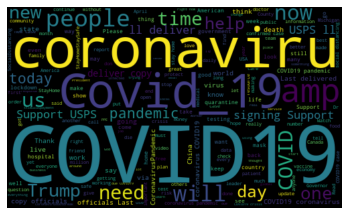

In [26]:
#Ploting Word cloud
allWords=''.join([twts for twts in clean_data['text']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
# Create function to compute the negative ,neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
clean_data['Analysis']=clean_data['Polarity'].apply(getAnalysis)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [29]:
clean_data.head()

,text,Subjectivity,Polarity,Analysis
0,G20 agrees to debt relief for poorest countrie...,0.000000,0.000000,Neutral
1,B.C. health officials are urging people to kin...,0.900000,0.600000,Positive
2,The Lovely Lisa Ann Joins The Show LIVE From N...,0.625000,0.356534,Positive
3,"As referenced, just saw this op-ed version ...",0.000000,0.000000,Neutral
4,Study suggests higher rates of co-infection be...,0.347222,-0.013889,Negative


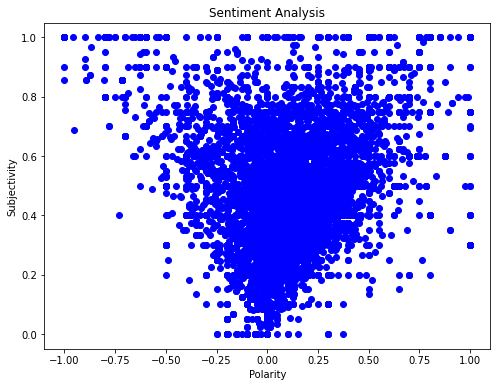

In [30]:
plt.figure(figsize=(8,6))
#for i in range(0,clean_data.shape[0]):
plt.scatter(clean_data['Polarity'],clean_data['Subjectivity'],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [31]:
# value counts
clean_data['Analysis'].value_counts()

Positive    4699
Neutral     3270
Negative    2031
Name: Analysis, dtype: int64

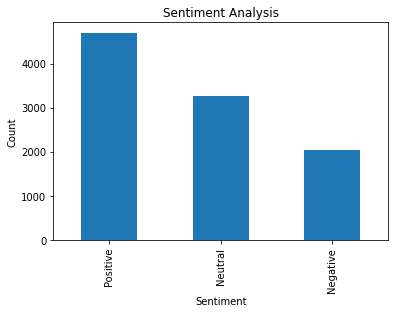

In [32]:
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
clean_data['Analysis'].value_counts().plot(kind='bar')
plt.show()

# Model buliding 

In [33]:
clean_data.head()

,text,Subjectivity,Polarity,Analysis
0,G20 agrees to debt relief for poorest countrie...,0.000000,0.000000,Neutral
1,B.C. health officials are urging people to kin...,0.900000,0.600000,Positive
2,The Lovely Lisa Ann Joins The Show LIVE From N...,0.625000,0.356534,Positive
3,"As referenced, just saw this op-ed version ...",0.000000,0.000000,Neutral
4,Study suggests higher rates of co-infection be...,0.347222,-0.013889,Negative


In [34]:
messages=clean_data[['text','Analysis']]

# Data Cleaning and Preprocessing

In [35]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [37]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

#one-hot-encoding for Analysis column
y=pd.get_dummies(messages['Analysis'])
y=y.iloc[:,1].values

# Train Test Split


In [38]:

# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Training model using Naive bayes classifier

In [39]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
model_nb = MultinomialNB().fit(X_train, y_train)
y_pred_nb=model_nb.predict(X_test)
#Accuracy
print("Accuracy for Naive bayes classifier:",accuracy_score(y_test, y_pred_nb))


Accuracy for Naive bayes classifier: 0.7695


# Plot ROC and  AUC for Naive Bayes 

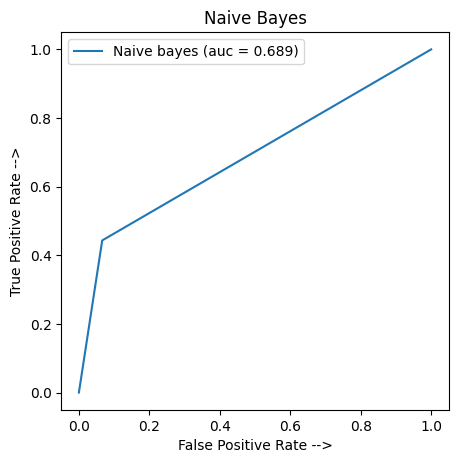

In [ ]:
from sklearn.metrics import roc_curve, auc

nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_nb)
auc_nb= auc(nb_fpr, nb_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(nb_fpr, nb_tpr, linestyle='-', label='Naive bayes (auc = %0.3f)' % auc_nb)
plt.title('Naive Bayes')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()


In [40]:
#Import svm model
from sklearn import svm
from sklearn.metrics import accuracy_score
#Create a svm Classifier
model_svm = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model_svm.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = model_svm.predict(X_test)
# print Accuracy
print("Accuracy for SVM classifier:",accuracy_score(y_test, y_pred_svm))

Accuracy for SVM classifier: 0.8285


# Plot ROC and AUC for SVM

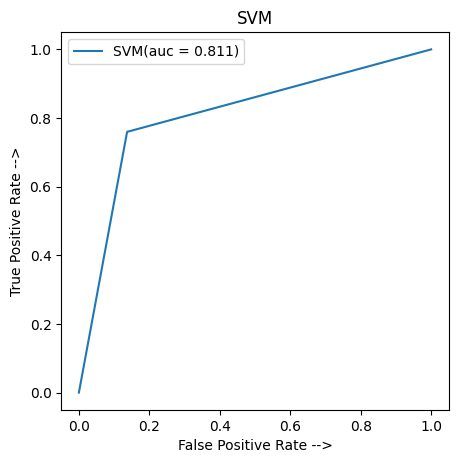

In [ ]:
from sklearn.metrics import roc_curve, auc

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm= auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM(auc = %0.3f)' % auc_svm)
plt.title('SVM')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# Model Building with Decision Tree Classification

In [41]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
# Create Decision Tree classifer object
model_dt= DecisionTreeClassifier()

# Train Decision Tree Classifer
model_dt = model_dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt= model_dt.predict(X_test)
print("Accuracy for Decesion Tree :",metrics.accuracy_score(y_test, y_pred_dt))

Accuracy for Decesion Tree : 0.796


# Plot ROC and AUC for Decision Tree

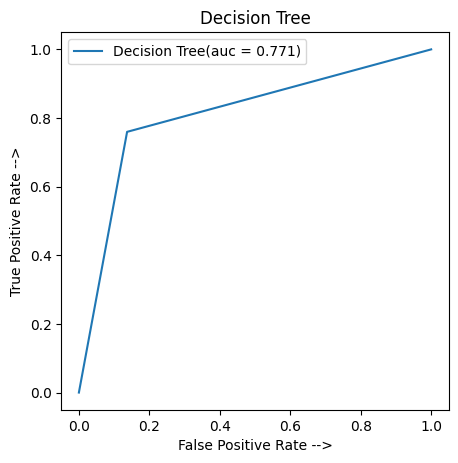

In [ ]:
from sklearn.metrics import roc_curve, auc
dt_fpr, dt_tpr, threshold = roc_curve(y_test, y_pred_dt)
auc_dt= auc(dt_fpr, dt_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='Decision Tree(auc = %0.3f)' % auc_dt)
plt.title('Decision Tree')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# Model Building using KNN Classification

In [42]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.436


# Plot ROC and AUC for KNN (n_neighbors=5)

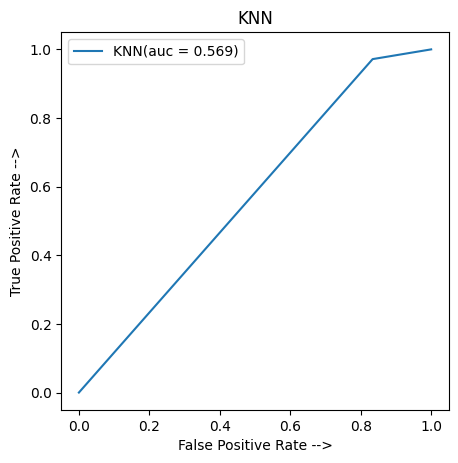

In [ ]:
from sklearn.metrics import roc_curve, auc
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred)
auc_knn= auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN(auc = %0.3f)' % auc_knn)
plt.title('KNN')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [43]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
model_knn = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
model_knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_knn = model_knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

Accuracy: 0.5225


# Plot ROC and AUC for KNN (n_neighbors=1)

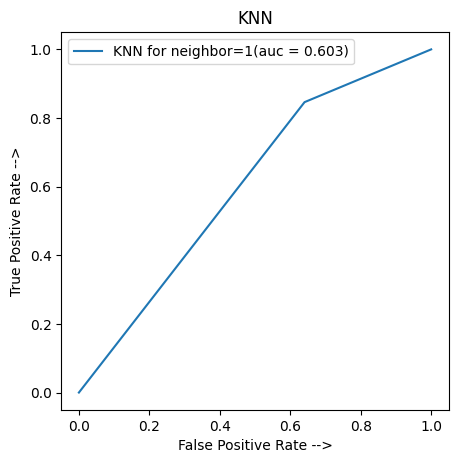

In [ ]:
from sklearn.metrics import roc_curve, auc
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn= auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN for neighbor=1(auc = %0.3f)' % auc_knn)
plt.title('KNN')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# Model Building using Random Forests Classifiers 

In [44]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

#Create a Gaussian Classifier
model_rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model_rf.fit(X_train,y_train)

y_pred_rf=model_rf.predict(X_test)
print("Accuracy for Random Forest:",metrics.accuracy_score(y_test, y_pred_rf))


Accuracy for Random Forest: 0.844


# Plot ROC and AUC for Random Forest

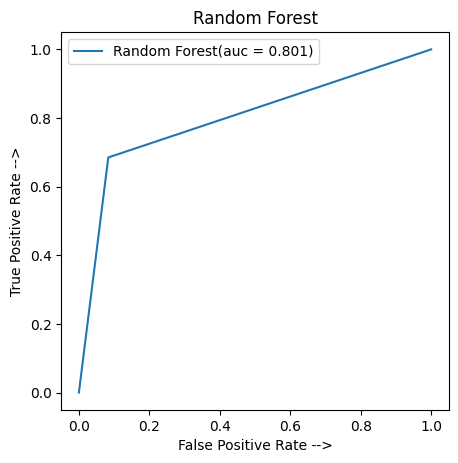

In [ ]:
from sklearn.metrics import roc_curve, auc
rf_fpr,rf_tpr, threshold = roc_curve(y_test, y_pred_rf)
auc_rf= auc(rf_fpr, rf_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='Random Forest(auc = %0.3f)' % auc_rf)
plt.title('Random Forest')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# Model Building using Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
model_lr = LogisticRegression()
model_lr = model_lr.fit (X_train,y_train)
y_pred_lr=model_lr.predict(X_test)
print("Accuracy for Logistic Regression :",metrics.accuracy_score(y_test, y_pred_lr))

Accuracy for Logistic Regression : 0.842


# Plot ROC and AUC for Logistic Regression 

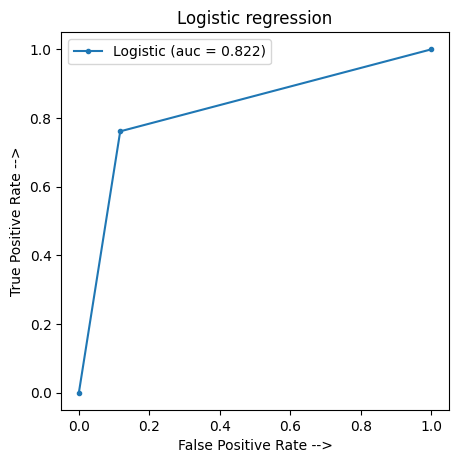

In [ ]:
from sklearn.metrics import roc_curve, auc
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)


plt.figure(figsize=(5, 5), dpi=100)

plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.title('Logistic regression')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# Plot ROC and compare AUC¶


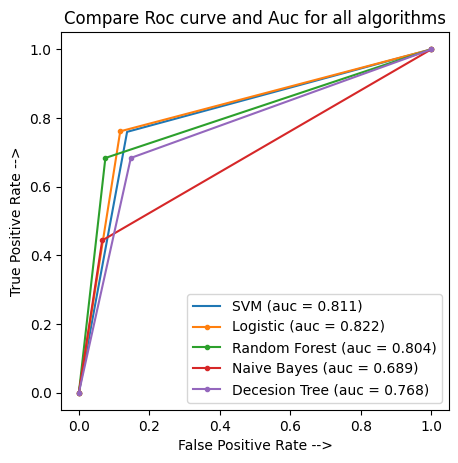

In [46]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

rf_fpr,rf_tpr, threshold = roc_curve(y_test, y_pred_rf)
auc_rf= auc(rf_fpr, rf_tpr)

nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_nb)
auc_nb= auc(nb_fpr, nb_tpr)


decesiontree_fpr,decesiontree_tpr, threshold = roc_curve(y_test, y_pred_dt)
auc_decesiontree= auc(decesiontree_fpr, decesiontree_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (auc = %0.3f)' % auc_rf)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (auc = %0.3f)' % auc_nb)
plt.plot(decesiontree_fpr, decesiontree_tpr, marker='.', label='Decesion Tree (auc = %0.3f)' % auc_decesiontree)
plt.title('Compare Roc curve and Auc for all algorithms')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()